# Import Data from Web

## 1. 웹 저장소에 있는 flat file 가져오기

In [1]:
from urllib.request import urlretrieve
import pandas as pd

In [2]:
# 레드 와인의 물리화학적 성분과 품질 등급 : University of California, Irvine
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

로컬에 파일로 저장한 후 데이터 읽기

In [3]:
urlretrieve(url, 'data/winequality-red.csv')

('data/winequality-red.csv', <http.client.HTTPMessage at 0x13f74f61978>)

In [4]:
df = pd.read_csv('data/winequality-red.csv', sep=';')  # 로컬 파일 읽기
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


파일을 로컬로 저장하지 않고 웹에서 바로 데이터프레임으로 읽기

In [5]:
df2 = pd.read_csv(url, sep=';')
df2.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0,0.5,'quality')

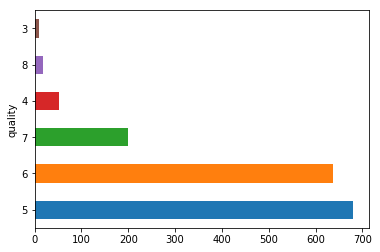

In [7]:
df['quality'].value_counts().plot(kind='barh')
plt.ylabel('quality')

Text(0,0.5,'count')

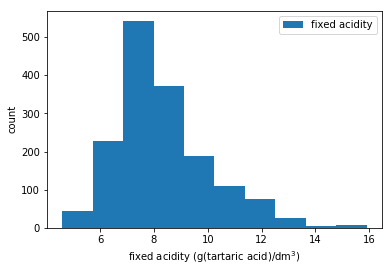

In [8]:
df.iloc[:, 0:1].plot(kind='hist')
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')

## 2. 웹 저장소에 있는 excel file 가져오기

In [9]:
url = 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'

xl = pd.read_excel(url, sheet_name=None)  # all sheets
xl.keys()   # sheet names

odict_keys(['1700', '1900'])

In [10]:
xl['1700'].head()

,country,1700
0,Afghanistan,34.565000
1,Akrotiri and Dhekelia,34.616667
2,Albania,41.312000
3,Algeria,36.720000
4,American Samoa,-14.307000


## 3. HTTP requests : requests

In [11]:
import requests

In [12]:
url = 'http://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=101&sid2=259'

r = requests.get(url)

text = r.text
text = "".join(text.split('\r\n'))    # 텍스트를 쪼갠 후 다시 합침.
text[:1000]

'<!DOCTYPE HTML><html lang="ko"><head><meta charset="euc-kr"><meta http-equiv="X-UA-Compatible" content="IE=edge"><meta name="referrer" contents="always"><meta http-equiv="refresh" content="600" /><meta name="viewport" content="width=1106" />                                                                                                                                                                                                                                                                                                                                                                                                    <meta property="og:title"       content="경제 금융 : 네이버뉴스"><meta property="og:type"        content="website"><meta property="og:url"         content="http://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=101&sid2=259"><meta property="og:image"       content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160804.png"/><meta property="og:desc

## 4. BeautifulSoup : HTML parsing

In [13]:
import requests
from bs4 import BeautifulSoup

In [14]:
url = 'http://finance.naver.com/news/news_list.nhn?mode=LSS2D&section_id=101&section_id2=258'  # 네이버 금융 뉴스

r = requests.get(url)
html_doc = r.text

In [15]:
# Create a BeautifulSoup object from the HTML
soup = BeautifulSoup(html_doc, "lxml")
pretty_soup = soup.prettify()
pretty_soup = "".join(pretty_soup.split('\n'))
pretty_soup[0:2000]

'<!--  global include --><html lang="ko"> <head>  <title>   네이버 금융  </title>  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>  <meta content="text/javascript" http-equiv="Content-Script-Type"/>  <meta content="text/css" http-equiv="Content-Style-Type"/>  <meta content="http://finance.naver.com/news/news_list.nhn?mode=LSS2D&amp;section_id=101&amp;section_id2=258&amp;type=0" property="og:url"/>  <meta content="실시간 속보 : 네이버 금융" property="og:title"/>  <meta content="관심종목의 실시간 주가를 가장 빠르게 확인하는 곳" property="og:description"/>  <meta content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png" property="og:image"/>  <meta content="article" property="og:type"/>  <meta content="" property="og:article:thumbnailUrl"/>  <meta content="네이버금융" property="og:article:author"/>  <meta content="http://FINANCE.NAVER.COM" property="og:article:author:url"/>  <link href="/css/finance_header.css?20190103155857" rel="stylesheet" type="text/css"/>  <link href="/css/newstock.cs

In [16]:
page_title = soup.title
page_title

<title>네이버 금융</title>

In [17]:
# 'a' 태그 검색
a_tags = soup.find_all('a')

for link in a_tags:
    title = link.get('title')
    href = link.get('href')
    if (href.find('LSS3D') > 0) & (title != None):   # 타이틀이 있고 특정 단어 포함한 링크만 출력
        print(link.get('title'))
        print(link.get('href'))

행남사 최대주주 주식담보설정 해지
/news/news_read.nhn?article_id=0004388527&office_id=277&mode=LSS3D&type=0&section_id=101&section_id2=258&section_id3=401
거래소, 케이엠더블유 불성실공시법인 지정 예고
/news/news_read.nhn?article_id=0004156088&office_id=008&mode=LSS3D&type=0&section_id=101&section_id2=258&section_id3=401
에어부산, LCC 최초 부산~싱가포르 부정기편 취항
/news/news_read.nhn?article_id=0004156086&office_id=008&mode=LSS3D&type=0&section_id=101&section_id2=258&section_id3=401
[표]아시아 주요 증시 동향(1월 4일)
/news/news_read.nhn?article_id=0003479492&office_id=011&mode=LSS3D&type=0&section_id=101&section_id2=258&section_id3=401
미래에셋대우, 합병 후 첫 희망퇴직 시행
/news/news_read.nhn?article_id=0010562974&office_id=001&mode=LSS3D&type=0&section_id=101&section_id2=258&section_id3=401
거래소, 행남사 불성실공시법인지정 예고
/news/news_read.nhn?article_id=0004285746&office_id=018&mode=LSS3D&type=0&section_id=101&section_id2=258&section_id3=401
거래소, 케이엠더블유 불성실공시법인 지정 예고
/news/news_read.nhn?article_id=0004285745&office_id=018&mode=LSS3D&type=0&section_id=101&section_id2=258&s

## 5. API & JSON

### Open Movie Database (OMDB) API 통해 영화 정보 가져오기

In [18]:
import requests

In [19]:
url = 'http://www.omdbapi.com/?t=avengers'
r = requests.get(url)
r.text

'{"Response":"False","Error":"No API key provided."}'

In [20]:
json_data = r.json()

# json_data 의 키-값 출력
for k in json_data.keys():
    print(k + ': ', json_data[k])

Response:  False
Error:  No API key provided.


# 6. Tweeter API

* https://dev.twitter.com 접속 후 회원가입
* 오른쪽 위 "My Apps" 선택
* Create New App
* 각 항목 입력 후 등록
* Keys and Access Tokens 탭으로 이동

(콘솔에서) pip3 install tweepy

In [21]:
import tweepy
import json
import pandas as pd

In [22]:
# OAuth authentication credentials
access_token = "719707261-cihmPGdeBpPGF4TtNX8g9NfomwIlttTu2B309R0x"
access_token_secret = "W45XmzFmFZewfPWPNjrsScnFLYbZAyVyLCN5qrpxbSjr5"
consumer_key = "Bd9IuuquDvd34YEgohyfQLPuY"
consumer_secret = "dhxlKev5UPivv4vQMSOjmAXW3yXByTqM2Fj3rjI6uBvEVRPEdC"

# tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [23]:
# 트위터 데이터 스트리밍 리스너 클래스
class TweetStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(TweetStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("tweets.txt", "w")  # 로컬에 파일로 저장.

    def on_status(self, status):
        tweet = status._json
        self.file.write( json.dumps(tweet) + '\n' )
        self.num_tweets += 1
        if self.num_tweets < 100:
            return True
        else:
            return False
        self.file.close()

    def on_error(self, status):
        print(status)

In [24]:
# 리스너 초기화
l = TweetStreamListener()
stream = tweepy.Stream(auth, l)

In [25]:
# 키워드
stream.filter(track=['clinton', 'trump', 'obama'])

In [26]:
tweets_data_file = 'tweets.txt'

tweets_data = []

# 파일을 읽어서 리스트에 담기
tweets_file = open(tweets_data_file, "r")

for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

tweets_file.close()

In [27]:
tweets_data[0].keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status', 'quoted_status_permalink', 'is_quote_status', 'extended_tweet', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted', 'filter_level', 'lang', 'timestamp_ms'])

In [28]:
# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text', 'favorite_count','retweet_count', 'lang'])
df.head()

,text,favorite_count,retweet_count,lang
0,@JoeNBC @maggieNYT @PhilipRucker Imagine if Mu...,0,0,en
1,Trump truer med veto - staten kan være stengt ...,0,0,da
2,RT @Education4Libs: The Democrats haven’t even...,0,0,en
3,RT @USATODAY: President Donald Trump told Cabi...,0,0,en
4,@WhiteHouse @realDonaldTrump A copy of the rep...,0,0,en


In [29]:
len(df)

98

### A little bit of Twitter text analysis

In [30]:
import re

def word_in_text(word, tweet):   # 문장 속에 해당 단어가 있는지 확인.
    word = word.lower()
    text = tweet.lower()
    match = re.search(word, text)
    
    if match:
        return True
    return False

In [31]:
[clinton, trump, obama] = [0, 0, 0]

for index, row in df.iterrows():
    #print(index, row['text'])
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    obama += word_in_text('obama', row['text'])

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

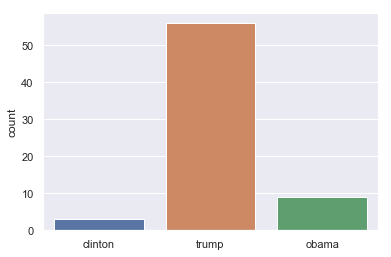

In [33]:
tx = sns.barplot(['clinton', 'trump', 'obama'], [clinton, trump, obama])
tx.set(ylabel="count")
plt.show()